# Market Model - Notebook 4
In this notebook batch-run is performed testing various model's DOF in order to be able to reproduce later these patterns like trends, aggregations and crashes.

In [1]:
# load config, libraries and scripts
%run 00.config.ipynb

# load built agents classes
%run 01.agents.ipynb

# load built models classes
%run 02.models.ipynb

## 4. Batch-Run

In [2]:
N_agents = 40
Price = 10
Last_Price = Price
p_savers = 0.20
p_followers = 0.10
p_whales = 0.05
savers_sentiment = 0.60
WLT = 10

# Choose the model, e.g. Market_Model_2 and pass the appropriate parameters
model = Market_Model_4(
    N_agents, Price,
    p_savers, p_followers, p_whales,
    savers_sentiment, WLT
)

prm_grid = {
    'N_agents': N_agents,
    'Price': Price,
    'p_savers': p_savers,
    'p_followers': p_followers,
    'p_whales': p_whales,
    'savers_sentiment': np.arange(0.20, 1.00, 0.10),
    'WLT': WLT
}

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
follower_0: 	 $ 563.86	 close_thr: 11.5%
follower_1: 	 $ 605.39	 close_thr: 7.2%
follower_2: 	 $ 610.71	 close_thr: 13.1%
follower_3: 	 $ 540.78	 close_thr: 13.1%
whale_0: 	 $ 10396.28	 close_thr: 96.8%	 WLT: 	10
whale_1: 	 $ 9310.96	 close_thr: 109.1%	 WLT: 	10


In [3]:
results = mesa.batch_run(
    Market_Model_4,
    parameters = prm_grid,
    iterations = 100,
    max_steps = 200,
    number_processes = 1,
    data_collection_period = 1,
    display_progress = False
)

saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
follower_0: 	 $ 563.86	 close_thr: 11.5%
follower_1: 	 $ 605.39	 close_thr: 7.2%
follower_2: 	 $ 610.71	 close_thr: 13.1%
follower_3: 	 $ 540.78	 close_thr: 13.1%
whale_0: 	 $ 10396.28	 close_thr: 96.8%	 WLT: 	10
whale_1: 	 $ 9310.96	 close_thr: 109.1%	 WLT: 	10
saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 $ 1020.4
follower_0: 	 $ 563.86	 close_thr: 11.5%
follower_1: 	 $ 605.39	 close_thr: 7.2%
follower_2: 	 $ 610.71	 close_thr: 13.1%
follower_3: 	 $ 540.78	 close_thr: 13.1%
whale_0: 	 $ 10396.28	 close_thr: 96.8%	 WLT: 	10
whale_1: 	 $ 9310.96	 close_thr: 109.1%	 WLT: 	10
saver_0: 	 $ 905.0
saver_1: 	 $ 948.98
saver_2: 	 $ 1047.29
saver_3: 	 $ 1048.13
saver_4: 	 $ 917.39
saver_5: 	 $ 906.36
saver_6: 	 $ 943.73
saver_7: 	 

In [4]:
results_df = pd.DataFrame(results)
display(results_df)

,RunId,iteration,Step,N_agents,Price,p_savers,p_followers,p_whales,savers_sentiment,WLT,AgentID,Wealth,Position,Order
0,0,0,0,40,9.600000,0.2,0.1,0.05,0.2,10,NaN,NaN,NaN,NaN
1,0,0,1,40,8.640000,0.2,0.1,0.05,0.2,10,rnd_trader_7,NaN,buy,1.0
2,0,0,1,40,8.640000,0.2,0.1,0.05,0.2,10,saver_6,943.73,sell,0.0
3,0,0,1,40,8.640000,0.2,0.1,0.05,0.2,10,saver_5,906.36,sell,0.0
4,0,0,1,40,8.640000,0.2,0.1,0.05,0.2,10,rnd_trader_10,NaN,buy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400795,799,99,200,40,1.995987,0.2,0.1,0.05,0.9,10,follower_2,2600.71,sell,1.0
6400796,799,99,200,40,1.995987,0.2,0.1,0.05,0.9,10,rnd_trader_16,NaN,sell,1.0
6400797,799,99,200,40,1.995987,0.2,0.1,0.05,0.9,10,follower_0,2553.86,buy,1.0
6400798,799,99,200,40,1.995987,0.2,0.1,0.05,0.9,10,saver_0,1455.00,buy,5.0


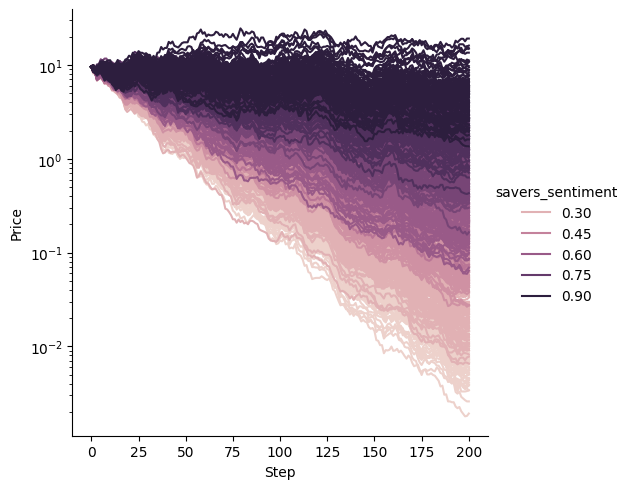

In [7]:
sns.relplot(
    data = results_df, kind = 'line',
    x = 'Step', y = 'Price', hue = 'savers_sentiment',
    units = 'iteration', estimator = None
)
plt.yscale('log')

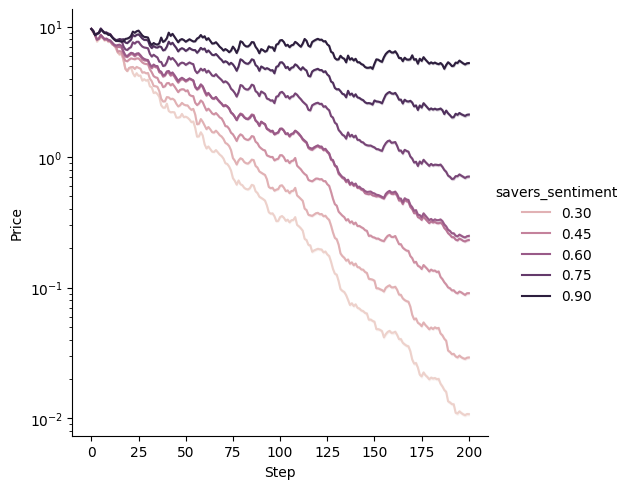

In [29]:
# this is a plot with mean values for each model parameter, with 95% confidence interval error band
sns.relplot(
    data = results_df, kind = 'line',
    x = 'Step', y = 'Price', hue = 'savers_sentiment'
)
plt.yscale('log')

In [30]:
_ = results_df[ results_df['savers_sentiment'] == results_df['savers_sentiment'].unique()[1]]

In [31]:
display(_)

,RunId,iteration,Step,N_agents,Price,p_savers,p_followers,p_whales,savers_sentiment,WLT,AgentID,Wealth,Position,Order
8001,1,0,0,40,9.60000,0.2,0.1,0.05,0.3,10,NaN,NaN,NaN,NaN
8002,1,0,1,40,8.64000,0.2,0.1,0.05,0.3,10,rnd_trader_7,NaN,buy,1.0
8003,1,0,1,40,8.64000,0.2,0.1,0.05,0.3,10,saver_6,943.73,sell,0.0
8004,1,0,1,40,8.64000,0.2,0.1,0.05,0.3,10,saver_5,906.36,sell,0.0
8005,1,0,1,40,8.64000,0.2,0.1,0.05,0.3,10,rnd_trader_10,NaN,buy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352789,793,99,200,40,0.01715,0.2,0.1,0.05,0.3,10,follower_2,2600.71,sell,1.0
6352790,793,99,200,40,0.01715,0.2,0.1,0.05,0.3,10,rnd_trader_16,NaN,buy,1.0
6352791,793,99,200,40,0.01715,0.2,0.1,0.05,0.3,10,follower_0,2553.86,sell,1.0
6352792,793,99,200,40,0.01715,0.2,0.1,0.05,0.3,10,saver_0,1455.00,buy,5.0


In [32]:
# But we are interested in a mean + std dev plot

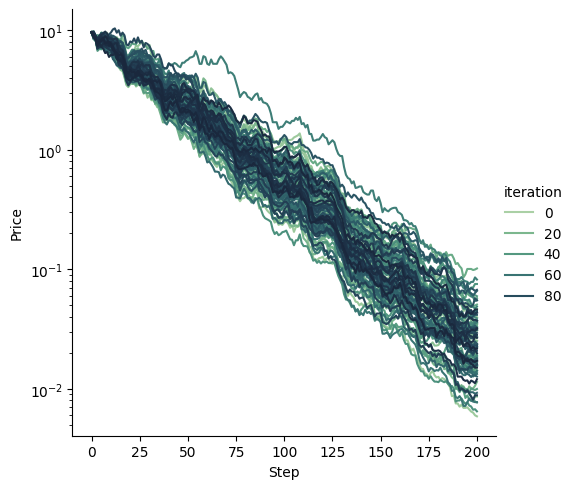

In [33]:
# Take a look at all runs for a given DOF, in this case for a given value of savers_sentiment
sns.relplot(
    data = _, kind = "line",
    x = "Step", y = "Price", hue = 'iteration', palette="ch:r=-.5,l=.75",
    estimator = None
)
plt.yscale('log')

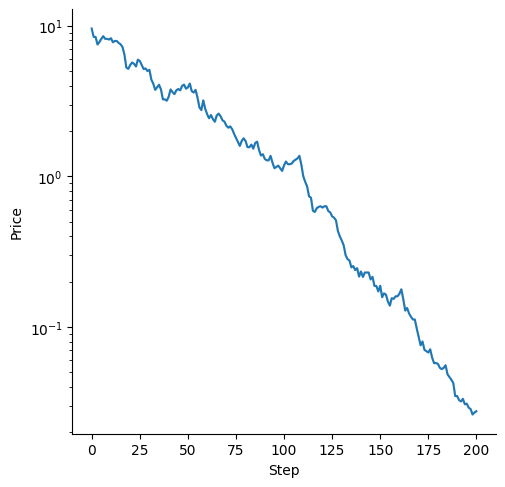

In [34]:
sns.relplot(
    data = _[ _['iteration'] == 5], kind="line",
    x="Step", y="Price",
)
plt.yscale('log')

In [35]:
_ = results_df[ results_df['savers_sentiment'] == results_df['savers_sentiment'].unique()[2]]

it = _['iteration'].unique().tolist()
it.pop(0)

_df = _[ _['iteration'] == 0].drop(columns = ['iteration'])
arr = np.arange(0, len(_df.dropna()), N_agents)
array_Price_values = _df.dropna().take(arr).Price.values

array_Step_values = _df.dropna().take(arr).Step.values

for el in it:
    
    _df = _[ _['iteration'] == el].drop(columns = ['iteration'])
    arr = np.arange(0, len(_df.dropna()), N_agents)
    array_Price_values_new = _df.dropna().take(arr).Price.values
    
    array_Price_values = np.vstack((array_Price_values, array_Price_values_new))

In [36]:
mean_Price_values = np.mean(array_Price_values, axis = 0)
std_Price_values = np.std(array_Price_values, axis = 0)

<Figure size 640x480 with 0 Axes>

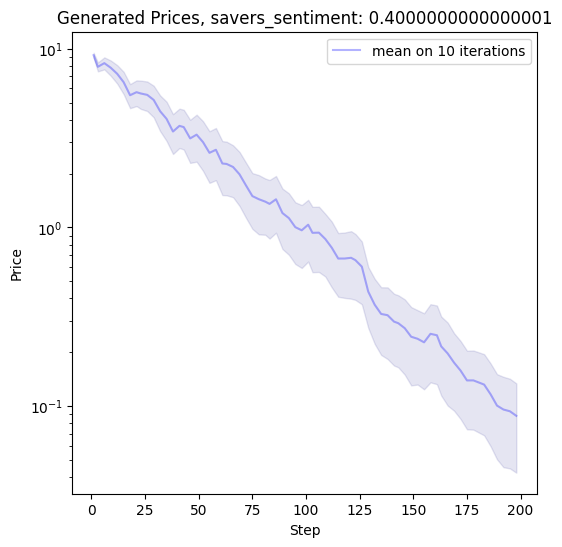

In [37]:
plt.figure()

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(array_Step_values, mean_Price_values, alpha=.3, label= 'mean on 10 iterations', color='blue')
ax.set(title = 'Generated Prices, savers_sentiment: {}'.format(results_df['savers_sentiment'].unique()[2]),
            xlabel = 'Step', ylabel = 'Price')
ax.fill_between(
    array_Step_values,
    mean_Price_values - std_Price_values,
    mean_Price_values + std_Price_values,
    alpha=0.1,
    color="navy",
    lw=1,
)

plt.legend()
plt.yscale('log')
plt.show();